In [40]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import iau2015 as const
from astropy import units

In [2]:
tid_g=np.load('/global/u1/z/zhaozhon/Dataset/tid_g.npy')
k_g=np.load('/global/u1/z/zhaozhon/Dataset/k_g.npy')
index_g=np.load('/global/u1/z/zhaozhon/Dataset/index_g.npy')
abs_mag_g=np.load('/global/u1/z/zhaozhon/Dataset/abs_mag_g.npy')
magerr_g_1=np.load('/global/u1/z/zhaozhon/Dataset/magerr_g_1.npy')
z_g = np.load('/global/u1/z/zhaozhon/Dataset/z_g.npy')
apr_mag_g=np.load('/global/u1/z/zhaozhon/Dataset/apr_mag_g.npy')

In [3]:
index_g2 = np.isnan(k_g) | np.isneginf(k_g)
print(np.max(k_g[~index_g2]))
print(np.min(k_g[~index_g2]))

-0.6831810858532186
-3.5613212494002173


In [4]:
filtered_abs_mag_g = abs_mag_g[index_g][~index_g2]
filtered_apr_mag_g = apr_mag_g[index_g][~index_g2]
filtered_magerr_g_1 = magerr_g_1[index_g][~index_g2]
filtered_z_g = z_g[index_g][~index_g2]
tid_g = tid_g[~index_g2]
k_g = k_g[~index_g2]

In [5]:
k_abs_mag_g = filtered_abs_mag_g - k_g

In [6]:
print(filtered_z_g)
print(k_abs_mag_g)

[2.13902358 2.2731864  2.28902289 ... 2.69651999 2.74777881 2.60038946]
[-25.58064676 -23.70581664 -24.52630419 ... -24.54199464 -25.73597377
 -25.52285191]


In [7]:

# Define the Chebyshev polynomials of the first kind
def T0(x):
    return 1

def T1(x):
    return x

def T2(x):
    return 2*x**2 - 1

# Define the parameter functions based on the equations given
def gamma1(z, a0, a1, a2):
    return a0 * T0(1 + z) + a1 * T1(1 + z) + a2 * T2(1 + z)

def gamma2(z, b0, b1, b2, z_ref):
    return 2 * b0 / (((1 + z) / (1 + z_ref))**b1 + ((1 + z) / (1 + z_ref))**b2)

def log_L_star(z, c0, c1, c2, z_ref):
    return 2 * c0 / (((1 + z) / (1 + z_ref))**c1 + ((1 + z) / (1 + z_ref))**c2)

def log_phi_star(z, d0, d1, z_ref):
    return d0 * T0(1 + z) + d1 * T1(1 + z)

def abs_mag_to_L(M):
    M_sun = 4.83  # Standard absolute magnitude of the Sun
    L_sun = 3.828e26  # Standard luminosity of the Sun in Watts
    # Calculate luminosity
    L = 10**((M_sun - M) / 2.5) * L_sun
    return L

# Define the luminosity function using the parameters from Best-fit A
def phi_bol(M,z, params, z_ref):
    L = abs_mag_to_L(M)
    gamma1_val = gamma1(z, params_A['a0'], params_A['a1'], params_A['a2'])
    gamma2_val = gamma2(z, params_A['b0'], params_A['b1'], params_A['b2'], z_ref)
    L_star_val = 10**log_L_star(z, params_A['c0'], params_A['c1'], params_A['c2'], z_ref)
    phi_star_val = 10**log_phi_star(z, params_A['d0'], params_A['d1'], z_ref)
    phi_bol_value_corrected = phi_star_val / ((L / L_star_val)**gamma1_val + (L / L_star_val)**gamma2_val)
    return phi_bol_value_corrected

# Parameters for Best-fit A
params_A = {
    'a0': 0.8569,
    'a1': -0.2614,
    'a2': 0.0200,
    'b0': 2.5375,
    'b1': -1.0425,
    'b2': 1.1201,
    'c0': 13.0088,
    'c1': -0.5759,
    'c2': 0.4554,
    'd0': -3.5426,
    'd1': -0.3936
}
z_ref = 2 

# Define the luminosity for which we want to compute the luminosity function

In [18]:
z_g = np.linspace(2.1,2.9,10000)
k_abs_mag_g = np.linspace(-20,-30,10000)
Z_g, K_abs_mag_g = np.meshgrid(z_g, k_abs_mag_g)

In [38]:
z = 1
Ms = np.linspace(-35 ,-25, 100)
Ls = abs_mag_to_L(Ms)
phis = phi_bol(Ms, z, params_A, z_ref)

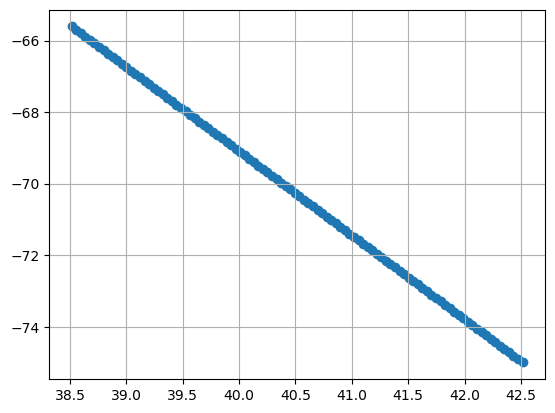

In [39]:
fig, ax = plt.subplots()
ax.scatter(np.log10(Ls), np.log10(phis))
ax.grid()
plt.show()


In [28]:
Z_g = np.flatten(Z_g)

AttributeError: module 'numpy' has no attribute 'flatten'

In [22]:
density = phi_bol(K_abs_mag_g ,Z_g, params_A, z_ref)

In [23]:
print(density)

[[5.80798993e-65 5.80973950e-65 5.81149008e-65 ... 2.44485415e-62
  2.44684848e-62 2.44884450e-62]
 [5.79445615e-65 5.79620167e-65 5.79794820e-65 ... 2.43942373e-62
  2.44141367e-62 2.44340530e-62]
 [5.78095391e-65 5.78269539e-65 5.78443787e-65 ... 2.43400538e-62
  2.43599093e-62 2.43797817e-62]
 ...
 [4.31842743e-75 4.31992886e-75 4.32143124e-75 ... 5.42043757e-72
  5.42569433e-72 5.43095636e-72]
 [4.30836463e-75 4.30986258e-75 4.31136148e-75 ... 5.40839789e-72
  5.41364306e-72 5.41889349e-72]
 [4.29832528e-75 4.29981976e-75 4.30131519e-75 ... 5.39638496e-72
  5.40161856e-72 5.40685742e-72]]


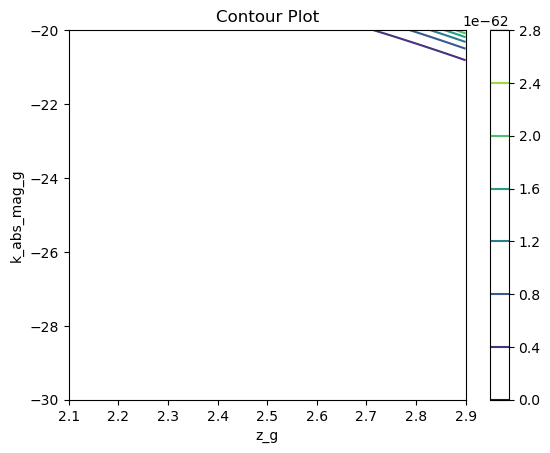

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Z_g and K_abs_mag_g are your meshgrid arrays
# Let's create a hypothetical function as Z value. For instance, Z = sin(Z_g) + cos(K_abs_mag_g)
Z = np.sin(Z_g) + np.cos(K_abs_mag_g)

plt.contour(Z_g, K_abs_mag_g, density)
plt.colorbar()  # To show the color scale
plt.xlabel('z_g')
plt.ylabel('k_abs_mag_g')
plt.title('Contour Plot')
plt.show()

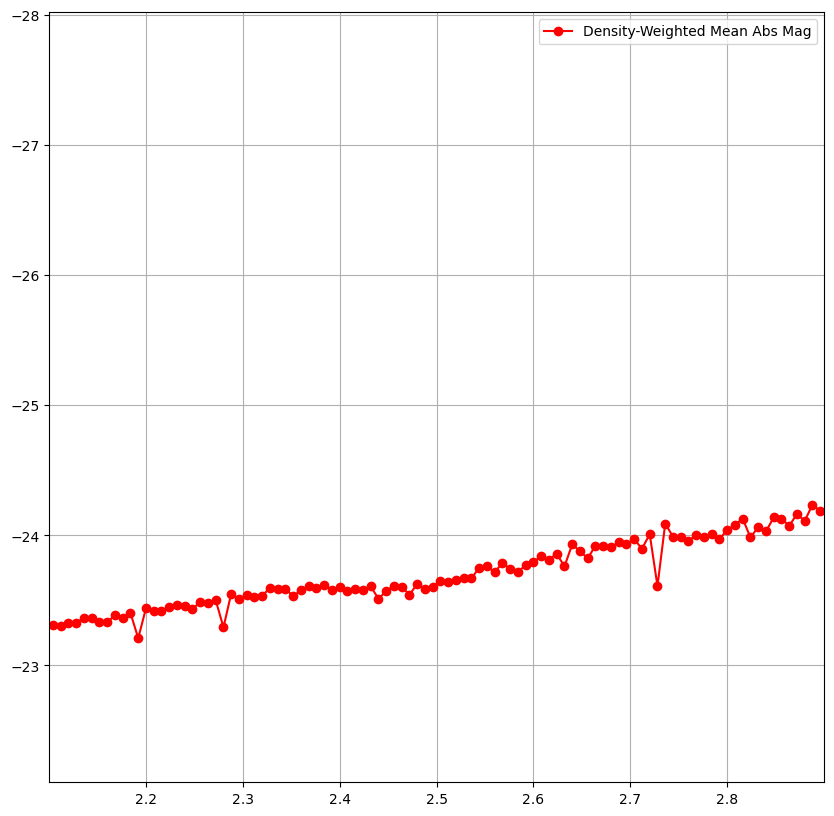

In [11]:
plt.figure(figsize=(10, 10))
# Define bin edges for redshift (z)
bins = np.linspace(min(filtered_z_g), max(filtered_z_g), 101)  # 100 bins means 101 edges
bin_indices = np.digitize(filtered_z_g, bins)

# Calculate the density-weighted sum of absolute magnitude for each bin
weighted_sums = np.array([np.sum(k_abs_mag_g[bin_indices == i] * density[bin_indices == i]) for i in range(1, len(bins))])

# Calculate the sum of densities for each bin
density_sums = np.array([np.sum(density[bin_indices == i]) for i in range(1, len(bins))])

# Avoid division by zero for bins with no density
with np.errstate(divide='ignore', invalid='ignore'):
    expectation_values = np.where(density_sums != 0, weighted_sums / density_sums, np.nan)

# Calculate the center of each bin for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Overlay the expectation values
plt.plot(bin_centers, expectation_values, 'ro-', label='Density-Weighted Mean Abs Mag')
plt.legend()

# Adjust the x and y limits to make sure all data and lines are visible
plt.xlim([min(filtered_z_g), max(filtered_z_g)])
plt.ylim([max(k_abs_mag_g), min(k_abs_mag_g)])  # Inverted because magnitude scales are often plotted high-to-low
plt.grid()
plt.show()